# HW3 Solutions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The theoretical capacity (mAh/g) is defined as:

$$
q = \frac{nF}{3600 \times M}
$$

For our case n=1, and M = 157.76 g/mol

In [5]:
capacity = 96500 / (3600 * (157.76/1000)) # convert g/mol to kg/mol
print(capacity)

169.91351138156415


In [21]:
from scipy.optimize import least_squares

def common_tangent(V):
    f = int_mu(V)
    Vr0, Vr1 = (0.01, 0.99)

    def residuals(x):
        v1, v2 = x
        f1, f2 = int_mu(v1), int_mu(v2)
        fp1, fp2 = mu(v1), mu(v2)
        sec = (f2 - f1)/(v2 - v1)

        return np.array([fp1 - fp2, sec - fp1])

    lb = np.array([0.0, 0.0])
    ub = np.array([1.0, 1.0])
    x0 = np.array([Vr0, Vr1])

    sol = least_squares(residuals, x0, bounds=(lb, ub), xtol=1e-6, ftol=1e-6, gtol=1e-12)
    v1, v2 = sol.x
    m = mu(v1)
    c = int_mu(v1) - m*v1

    plt.scatter([v1, v2], int_mu(np.array([v1, v2])), marker="x", lw=2, color="red")

    print(f"Phase coexistence region : ({v1}, {v2})")
    print(f"Miscibility gap : ({abs(v1-v2)})")
    print(f"Phase coexistence chemical potential: {abs(m)}")
    idx1 = np.where(V <= v1)[0][-1]
    idx2 = np.where(V >= v2)[0][0]

    f[idx1:idx2] = m * V[idx1:idx2] + c
    return f, v1, v2, abs(m)

Phase coexistence region : (0.06087517121344903, 0.9391248287865965)
Miscibility gap : (0.8782496575731475)
Phase coexistence chemical potential: 0.009999999999930443


Text(0, 0.5, '$\\mu_{eq}$')

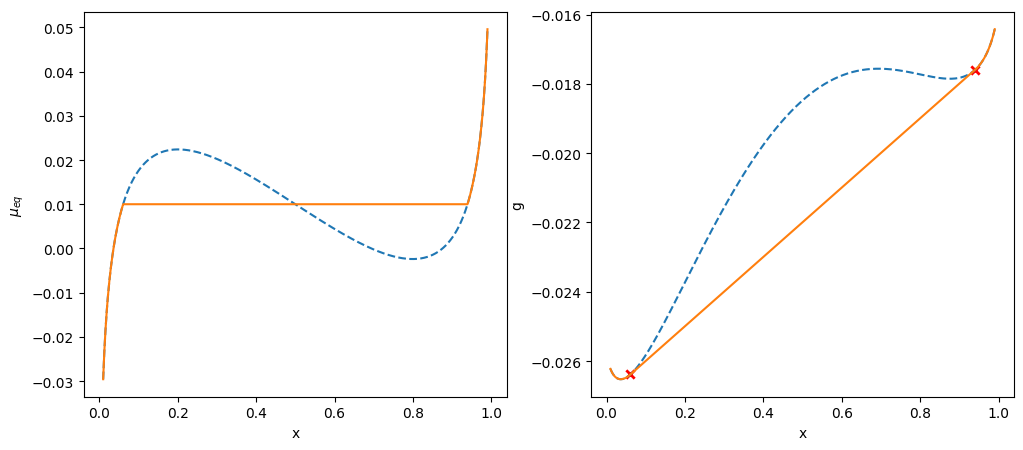

In [26]:
def int_mu(x):
    kB = 8.617e-5
    omega = 0.08
    mu0a = 0.02
    mu0b = 0.03
    T = 298
    # This is the same expression as g in the notes but missing some constants, which should not make a difference for this question
    g = omega * (x-x**2) + kB*T*((x * np.log(x) - x) - (-np.log(1-x) * (1-x) + (1-x))) - mu0a * x + mu0b *x
    return g

def mu(x):
  kB = 8.617e-5
  omega = 0.08
  mu0a = 0.02
  mu0b = 0.03
  T = 298
  mu_b = omega * (1-2*x) + kB*T*(np.log(x) - np.log(1-x)) - mu0a + mu0b
  return mu_b

x = np.linspace(0.01, 0.99, 1000)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


g_mod, x1, x2, mu_coex = common_tangent(x)


idx = np.where((x>x1) & (x<x2))[0]
mu_val = mu(x)
mu_val[idx] = mu_coex

ax[0].plot(x, mu(x), linestyle="--")
ax[0].plot(x, mu_val)


ax[1].plot(x, int_mu(x), linestyle="--")
ax[1].plot(x, g_mod)


ax[1].set_xlabel('x')
ax[1].set_ylabel('g')

ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$\mu_{eq}$')

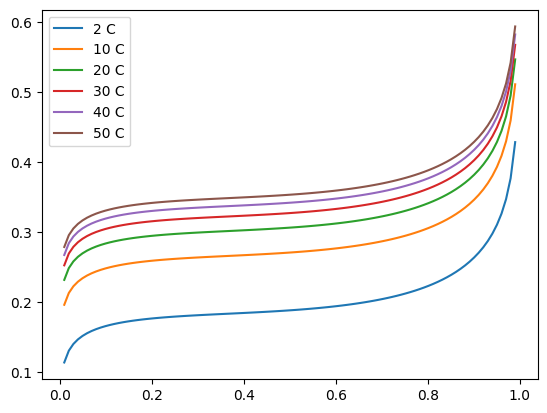

In [30]:
def mu(x, C_rate=1):
  J_J00 = 8 * C_rate
  kB = 8.617e-5
  T = 298

  omega = 0.08
  mu0a = 0.02
  mu0b = 0.03

  mu_b = omega * (1-2*x) + kB*T*(np.log(x) - np.log(1-x)) - mu0a + mu0b

  del_phi = 2 * kB * T * np.arcsinh(0.5 * J_J00 / (1-x)**(1.))

  return mu_b + del_phi

fig, ax = plt.subplots(1, 1)

C_rates = [2, 10, 20, 30, 40, 50]

for C_rate in C_rates:
  x = np.linspace(0.01, 0.99, 100)
  ax.plot(x, mu(x, C_rate), label=f"{C_rate} C")

plt.legend()

We don't observe phase separation anymore.

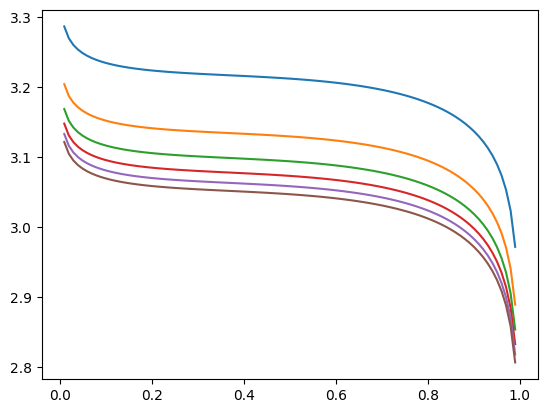

In [36]:
fig, ax = plt.subplots(1, 1)

for C_rate in C_rates:
  x = np.linspace(0.01, 0.99, 100)
  ax.plot(x, 3.4 - mu(x, C_rate), label=f"{C_rate} C")